# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_data = pd.read_csv('heart_disease_multi.csv', sep=';')
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
heart_data.drop(['id','dataset'], axis=1, inplace=True)
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [4]:
heart_data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
categori_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
numerikal_col = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

heart_cat = heart_data[categori_col]
heart_num = heart_data[numerikal_col]

heart_cat.nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
thal       3
ca         4
dtype: int64

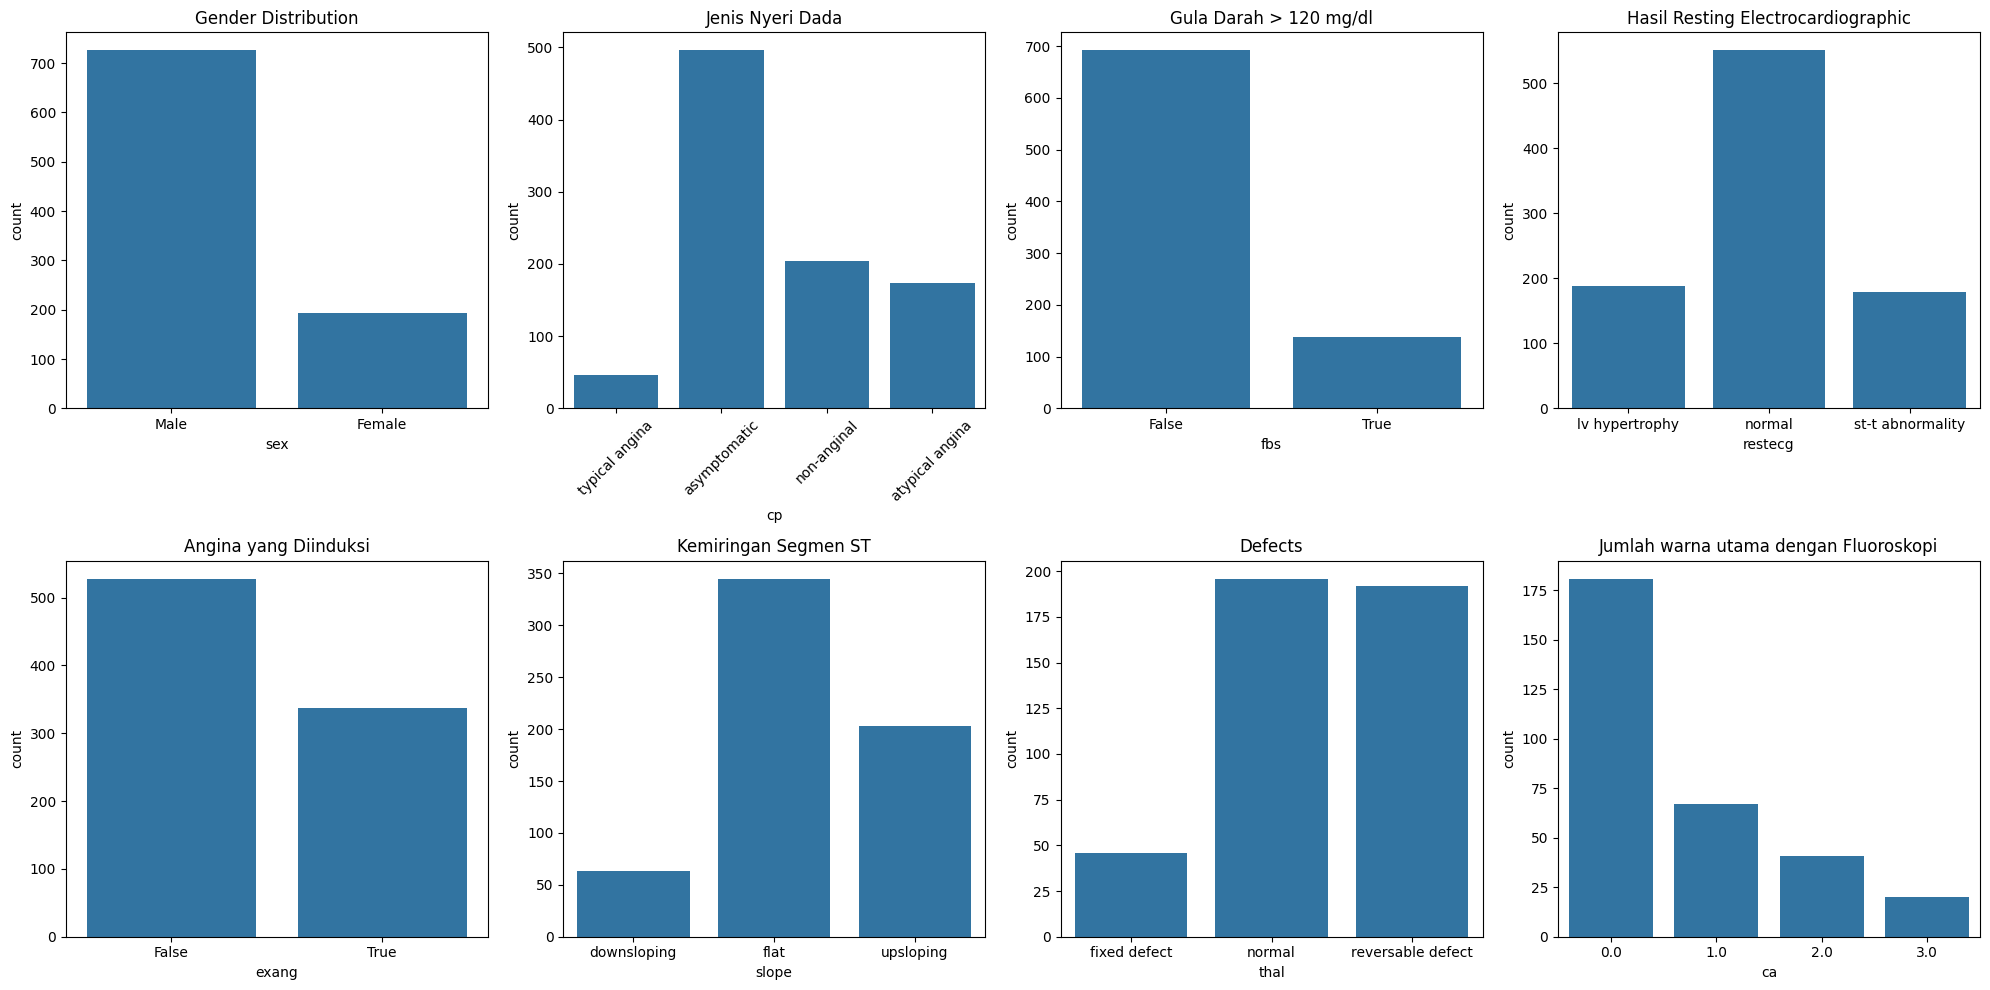

In [6]:
# Visualisasi dari variabel kategorikal

fig, axes = plt.subplots(2, 4, figsize=(20,10))

sns.countplot(x='sex', data=heart_cat, ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')

sns.countplot(x='cp', data=heart_cat, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Jenis Nyeri Dada')

sns.countplot(x='fbs', data=heart_cat, ax=axes[0,2])
axes[0,2].set_title('Gula Darah > 120 mg/dl')

sns.countplot(x='restecg', data=heart_cat, ax=axes[0,3])
axes[0,3].set_title('Hasil Resting Electrocardiographic')

sns.countplot(x='exang', data=heart_cat, ax=axes[1,0])
axes[1,0].set_title('Angina yang Diinduksi')

sns.countplot(x='slope', data=heart_cat, ax=axes[1,1])
axes[1,1].set_title('Kemiringan Segmen ST')

sns.countplot(x='thal', data=heart_cat, ax=axes[1,2])
axes[1,2].set_title('Defects')

sns.countplot(x='ca', data=heart_cat, ax=axes[1,3])
axes[1,3].set_title('Jumlah warna utama dengan Fluoroskopi')
plt.tight_layout()
plt.show()

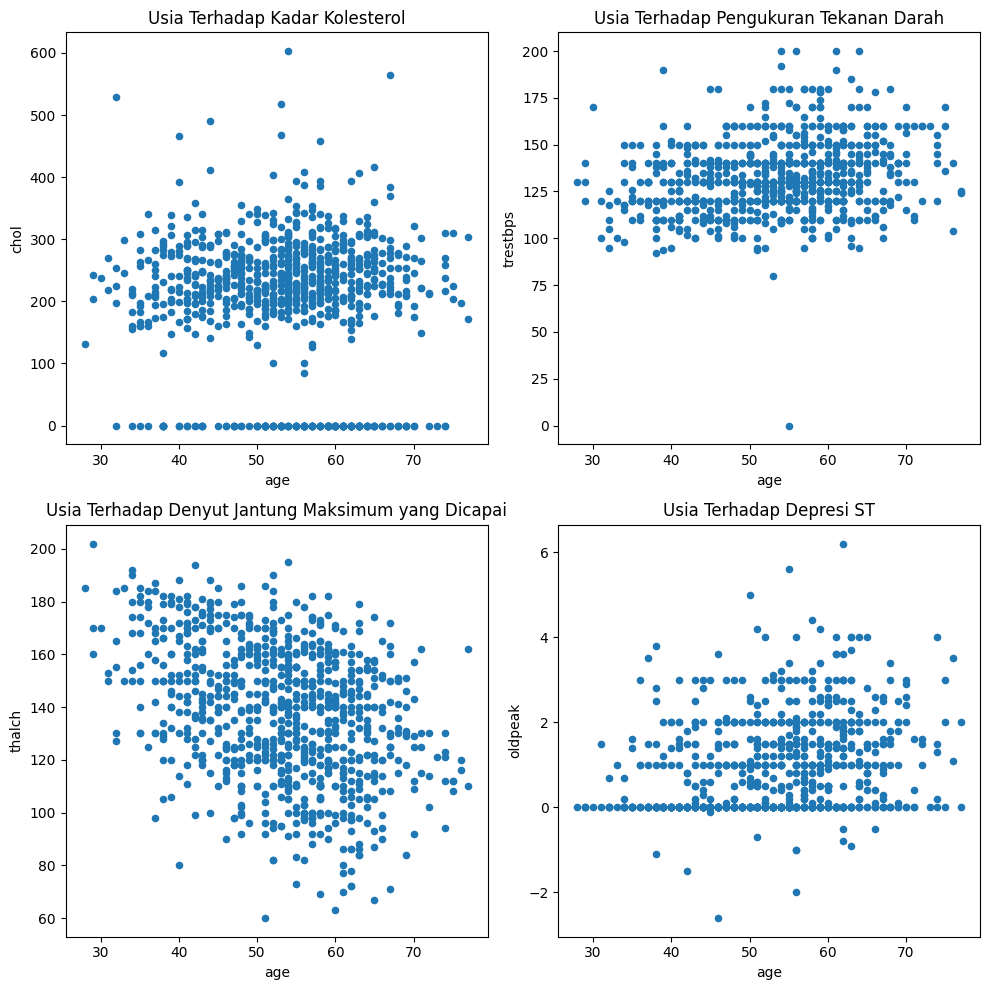

In [7]:
# Visualisasi kunci relationship pada numerical data
fig, axes = plt.subplots(2, 2, figsize=(10,10))

heart_num.plot('age', 'chol', kind='scatter', ax=axes[0,0])
axes[0,0].set_title('Usia Terhadap Kadar Kolesterol')

heart_num.plot('age', 'trestbps', kind='scatter', ax=axes[0,1])
axes[0,1].set_title('Usia Terhadap Pengukuran Tekanan Darah')

heart_num.plot('age', 'thalch', kind='scatter', ax=axes[1,0])
axes[1,0].set_title('Usia Terhadap Denyut Jantung Maksimum yang Dicapai')

heart_num.plot('age', 'oldpeak', kind='scatter', ax=axes[1,1])
axes[1,1].set_title('Usia Terhadap Depresi ST')

plt.tight_layout()
plt.show()

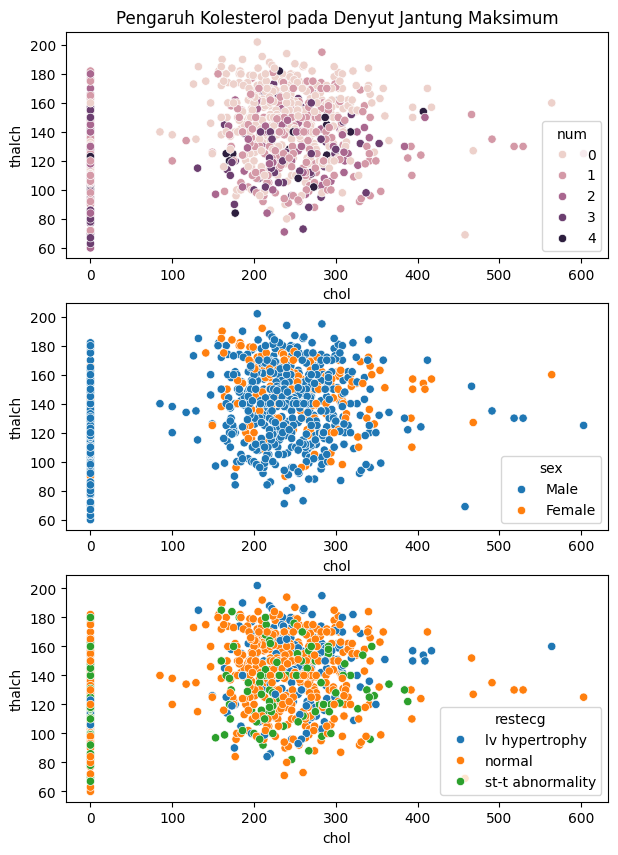

In [8]:
fig, axes = plt.subplots(3, figsize=(7,10))

sns.scatterplot(x='chol', y='thalch', hue='num', data=heart_data, ax=axes[0])
axes[0].set_title('Pengaruh Kolesterol pada Denyut Jantung Maksimum')

sns.scatterplot(x='chol', y='thalch', hue='sex', data=heart_data, ax=axes[1])

sns.scatterplot(x='chol', y='thalch', hue='restecg', data=heart_data, ax=axes[2])
plt.show()

In [9]:
heart_data['sex'] = heart_data['sex'].astype('category')

In [10]:
print(heart_data['cp'].unique())

['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']


In [11]:
cp_count = heart_data.groupby(['num', 'cp']).size().unstack(fill_value=0)
cp_count

cp,asymptomatic,atypical angina,non-anginal,typical angina
num,,,,
0,104,150,131,26
1,197,19,37,12
2,89,2,14,4
3,83,3,18,3
4,23,0,4,1


In [12]:
heart_data['sex'] = pd.Categorical(heart_data['sex'])

In [13]:
# heart_data.drop(columns=['sex'], inplace=True)

In [14]:
print('Kadar Kolesterol Rata-Rata Berdasarkan Variabel Target dan Jenis Nyeri Dada')
print(pd.crosstab(index=heart_data.num, columns=heart_data.cp, values=heart_data.chol, aggfunc=np.mean))
print('\n')

print('Kadar Kolesterol Rata-Rata Berdasarkan Variabel Target dan Jenis Kelamin Pasien')
print(pd.crosstab(index=heart_data.num, columns=heart_data.sex, values=heart_data.chol, aggfunc=np.mean))
print('\n')

print('Kadar Kolesterol Rata-rata Berdasarkan Variabel Target dan Hasil Kardiografi')
print(pd.crosstab(index=heart_data.num, columns=heart_data.restecg, values=heart_data.chol, aggfunc=np.mean))

Kadar Kolesterol Rata-Rata Berdasarkan Variabel Target dan Jenis Nyeri Dada
cp   asymptomatic  atypical angina  non-anginal  typical angina
num                                                            
0      227.843137       233.957143   222.209677      222.730769
1      193.273684       250.157895   170.756757      215.250000
2      152.321839       123.000000   118.642857       58.500000
3      157.219512       200.000000   152.888889      228.666667
4      196.478261              NaN   146.000000      231.000000


Kadar Kolesterol Rata-Rata Berdasarkan Variabel Target dan Jenis Kelamin Pasien
sex      Female        Male
num                        
0    248.102190  217.054902
1    221.366667  191.820175
2    216.400000  136.381443
3    216.250000  155.102041
4    316.000000  182.240000


Kadar Kolesterol Rata-rata Berdasarkan Variabel Target dan Hasil Kardiografi
restecg  lv hypertrophy      normal  st-t abnormality
num                                                  
0          

C:\Users\AHMAD RAFI\AppData\Local\Temp\ipykernel_4480\3078909566.py:2: FutureWarning: The provided callable <function mean at 0x00000245393D7560> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.crosstab(index=heart_data.num, columns=heart_data.cp, values=heart_data.chol, aggfunc=np.mean))
C:\Users\AHMAD RAFI\AppData\Local\Temp\ipykernel_4480\3078909566.py:6: FutureWarning: The provided callable <function mean at 0x00000245393D7560> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.crosstab(index=heart_data.num, columns=heart_data.sex, values=heart_data.chol, aggfunc=np.mean))
C:\Users\AHMAD RAFI\AppData\Local\Temp\ipykernel_4480\3078909566.py:10: FutureWarning: The provided callable <function mean at 0x00000245393D75

**Korelasi**

               age  trestbps      chol    thalch   oldpeak        ca       num
age       1.000000  0.244253 -0.086234 -0.365778  0.258243  0.370416  0.339596
trestbps  0.244253  1.000000  0.092853 -0.104899  0.161908  0.093705  0.122291
chol     -0.086234  0.092853  1.000000  0.236121  0.047734  0.051606 -0.231547
thalch   -0.365778 -0.104899  0.236121  1.000000 -0.151174 -0.264094 -0.366265
oldpeak   0.258243  0.161908  0.047734 -0.151174  1.000000  0.281817  0.443084
ca        0.370416  0.093705  0.051606 -0.264094  0.281817  1.000000  0.516216
num       0.339596  0.122291 -0.231547 -0.366265  0.443084  0.516216  1.000000


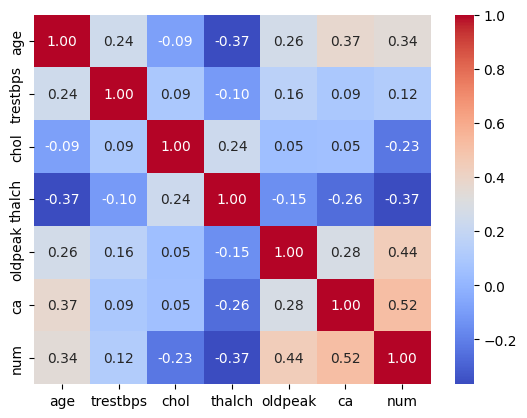

In [15]:
numerical_cols = heart_data.select_dtypes(include=['int64', 'float64'])
corr = numerical_cols.corr()
print(corr)

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

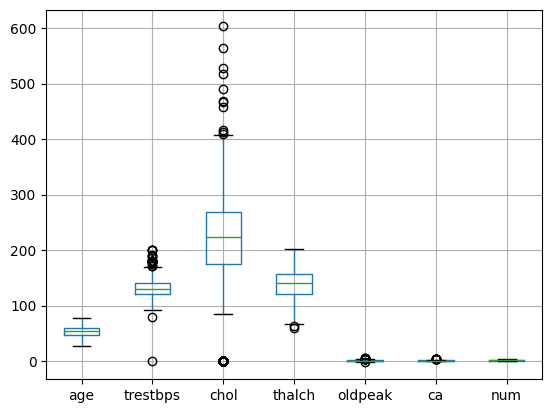

In [16]:
heart_data.boxplot()
plt.show()

In [17]:
heart_data.loc[heart_data['chol']==0,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,32,Male,typical angina,95.0,0.0,NaN,normal,127.0,False,0.7,upsloping,NaN,NaN,1
598,34,Male,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1
599,35,Male,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
600,36,Male,asymptomatic,110.0,0.0,NaN,normal,125.0,True,1.0,flat,NaN,fixed defect,1
601,38,Female,asymptomatic,105.0,0.0,NaN,normal,166.0,False,2.8,upsloping,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,43,Male,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
819,63,Male,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,NaN,NaN,0
822,48,Male,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1
839,56,Male,asymptomatic,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1


# Data Cleansing

In [18]:
heart_data_clean = heart_data.dropna()

In [19]:
selected_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_df_clean = heart_data_clean[selected_columns]

In [20]:
heart_df_clean['sex'] = heart_df_clean['sex'].astype('object')
heart_df_clean['cp'] = heart_df_clean['cp'].astype('object')
heart_df_clean['fbs'] = heart_df_clean['fbs'].astype('object')
heart_df_clean['restecg'] = heart_df_clean['restecg'].astype('object')
heart_df_clean['exang'] = heart_df_clean['exang'].astype('object')
heart_df_clean['slope'] = heart_df_clean['slope'].astype('object')
heart_df_clean['thal'] = heart_df_clean['thal'].astype('object')

In [21]:
heart_df_clean.drop(labels=['ca', 'thal', 'slope'], axis=1, inplace=True)

In [22]:
print(heart_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  num       299 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 28.0+ KB
None


In [23]:
# Tingkat kolestrol
median_chol = heart_data.loc[heart_data['chol']!=0, 'chol'].mean()
heart_df_clean = heart_data.fillna(value={'chol': median_chol})
heart_df_clean.loc[heart_df_clean['chol']==0, 'chol'] = median_chol

In [24]:
# Rata-rata maximum jantung
mean_hr = heart_df_clean.loc[heart_df_clean['thalch']!=0,'thalch'].mean()
heart_df_clean = heart_df_clean.fillna(value={'thalch': mean_hr})
heart_df_clean.loc[heart_df_clean['thalch']==0, 'thalch'] = mean_hr

In [25]:
# Umur
mean_peak = heart_df_clean.oldpeak.mean()
heart_df_clean = heart_df_clean.fillna(value={'oldpeak': mean_peak})
heart_df_clean.loc[heart_df_clean['oldpeak']==0, 'oldpeak'] = mean_peak

In [26]:
# Hapus kolom dengan banyak nilai yang hilang dan tetapkan kembali tipe data
heart_df_clean['sex'] = heart_df_clean['sex'].astype('category')
heart_df_clean['cp'] = heart_df_clean['cp'].astype('category')
heart_df_clean['fbs'] = heart_df_clean['fbs'].astype('bool')
heart_df_clean['restecg'] = heart_df_clean['restecg'].astype('category')
heart_df_clean['exang'] = heart_df_clean['exang'].astype('bool')

C:\Users\AHMAD RAFI\AppData\Local\Temp\ipykernel_4480\3592049129.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=heart_df_clean, palette=custom_palette)


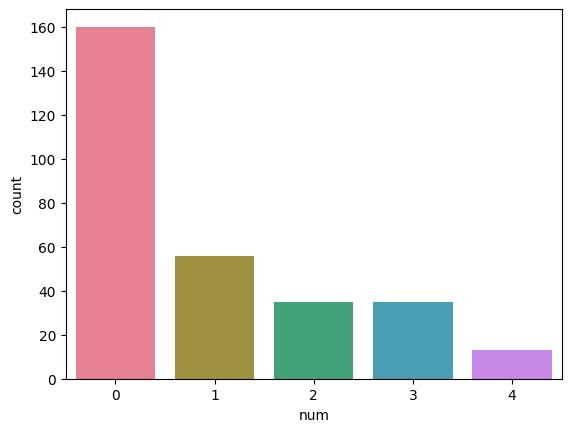

In [27]:
# Hapus baris yang tersisa dengan nilai yang hilang dan tampilkan distribusi untuk variabel target
custom_palette = sns.color_palette("husl", 5)
heart_df_clean.dropna(inplace=True)
sns.countplot(x='num', data=heart_df_clean, palette=custom_palette)
plt.show()

In [28]:
heart_df_clean.num.value_counts()

num
0    160
1     56
2     35
3     35
4     13
Name: count, dtype: int64

In [29]:
heart_df_clean.to_csv('heart_data_cleansing.csv', index = False)

# Split + Resampling

In [30]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Membaca data
# data = pd.read_csv('heart_data_cleansing.csv')

# # Membagi data menjadi train dan test
# train_data, test_data = train_test_split(data, test_size=0.3, random_state=21, stratify=data['num'])

# # Membuat DataFrame kosong untuk menyimpan data hasil resampling
# resampled_train_data = pd.DataFrame(columns=train_data.columns)

# # Menentukan target jumlah data per kelas
# target_samples = 150

# # Melakukan resampling untuk setiap kelas di train_data
# for class_label in range(5):
#     # Memilih data dengan kelas tertentu
#     class_data = train_data[train_data['num'] == class_label]

#     # Memeriksa jumlah data pada kelas ini
#     num_samples = class_data.shape[0]

#     # Menghitung berapa kali replikasi atau tambahan sampel diperlukan
#     if num_samples < target_samples:
#         # Jika jumlah data kurang dari target, tambahkan sampel acak dengan penggantian
#         additional_samples = class_data.sample(n=target_samples - num_samples, replace=True, random_state=42)
#         resampled_samples = pd.concat([class_data, additional_samples], ignore_index=True)
#     elif num_samples > target_samples:
#         # Jika jumlah data melebihi target, ambil sampel acak
#         resampled_samples = class_data.sample(n=target_samples, random_state=42)
#     else:
#         # Jika jumlah data sudah sama dengan target, gunakan data tersebut tanpa perubahan
#         resampled_samples = class_data

#     # Menggabungkan data hasil resampling ke dalam DataFrame resampled_train_data
#     resampled_train_data = pd.concat([resampled_train_data, resampled_samples], ignore_index=True)

# # Menyimpan data hasil resampling ke dalam file CSV
# resampled_train_data.to_csv('heart_train_data_resampled_150.csv', index=False)
# test_data.to_csv('heart_test_data_3_size.csv', index=False)


In [31]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# # Membaca data
# data = pd.read_csv('heart_data_cleansing.csv')

# # Membagi data menjadi train dan test
# train_data, test_data = train_test_split(data, test_size=0.3, random_state=21, stratify=data['num'])

# # Pisahkan fitur dan target
# X_train = train_data.drop(columns='num')
# y_train = train_data['num']

# # One-Hot Encoding untuk fitur kategori
# X_train_encoded = pd.get_dummies(X_train)

# # Inisialisasi SMOTE dengan target jumlah sampel per kelas
# smote = SMOTE(sampling_strategy={0: 150, 1: 150, 2: 150, 3: 150, 4: 150}, random_state=42)

# # Terapkan SMOTE untuk menyeimbangkan kelas
# X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

# # Gabungkan kembali fitur dan target menjadi satu DataFrame
# resampled_train_data = pd.concat([X_resampled, y_resampled], axis=1)

# # Simpan data hasil resampling ke dalam file CSV
# resampled_train_data.to_csv('heart_train_data_resampled_smote.csv', index=False)
# test_data.to_csv('heart_test_data_smote.csv', index=False)


In [32]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# # Membaca data
# data = pd.read_csv('heart_data_cleansing.csv')

# # Membagi data menjadi train dan test
# train_data, test_data = train_test_split(data, test_size=0.3, random_state=21, stratify=data['num'])

# # Pisahkan fitur dan target
# X_train = train_data.drop(columns='num')
# y_train = train_data['num']

# # One-Hot Encoding untuk fitur kategori
# X_train_encoded = pd.get_dummies(X_train)

# # Menghitung jumlah data asli per kelas
# class_counts = y_train.value_counts()

# # Menentukan target jumlah sampel per kelas setelah penambahan 20%
# target_counts = {
#     1: int(class_counts[1] * 1.2),
#     2: int(class_counts[2] * 1.2),
#     3: int(class_counts[3] * 1.2),
#     4: int(class_counts[4] * 1.2)
# }

# # Inisialisasi SMOTE dengan target jumlah sampel per kelas
# smote = SMOTE(sampling_strategy=target_counts, random_state=42)

# # Terapkan SMOTE untuk menambah jumlah sampel kelas "1", "2", "3", dan "4"
# X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

# # Gabungkan kembali fitur dan target menjadi satu DataFrame
# resampled_train_data = pd.concat([X_resampled, y_resampled], axis=1)

# # Simpan data hasil resampling ke dalam file CSV
# resampled_train_data.to_csv('heart_train_data_resampled_smote_20.csv', index=False)
# test_data.to_csv('heart_test_data_smote_20.csv', index=False)


In [33]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.utils import resample

# # Membaca data
# data = pd.read_csv('heart_data_cleansing.csv')

# # Membagi data menjadi train dan test
# train_data, test_data = train_test_split(data, test_size=0.3, random_state=21, stratify=data['num'])

# # Membuat DataFrame kosong untuk menyimpan data hasil resampling
# resampled_train_data = pd.DataFrame(columns=train_data.columns)

# # Menentukan target jumlah data per kelas
# target_samples = 150

# # Melakukan resampling untuk setiap kelas di train_data
# for class_label in range(5):
#     # Memilih data dengan kelas tertentu
#     class_data = train_data[train_data['num'] == class_label]

#     # Memeriksa jumlah data pada kelas ini
#     num_samples = class_data.shape[0]

#     # Menghitung berapa kali replikasi atau tambahan sampel diperlukan
#     if num_samples < target_samples:
#         # Jika jumlah data kurang dari target, tambahkan sampel acak dengan penggantian
#         additional_samples = resample(class_data, 
#                                       replace=True, 
#                                       n_samples=target_samples - num_samples, 
#                                       random_state=42)
#         resampled_samples = pd.concat([class_data, additional_samples], ignore_index=True)
#     elif num_samples > target_samples:
#         # Jika jumlah data melebihi target, ambil sampel acak
#         resampled_samples = resample(class_data, 
#                                      replace=False, 
#                                      n_samples=target_samples, 
#                                      random_state=42)
#     else:
#         # Jika jumlah data sudah sama dengan target, gunakan data tersebut tanpa perubahan
#         resampled_samples = class_data

#     # Menggabungkan data hasil resampling ke dalam DataFrame resampled_train_data
#     resampled_train_data = pd.concat([resampled_train_data, resampled_samples], ignore_index=True)

# # Menyimpan data hasil resampling ke dalam file CSV
# resampled_train_data.to_csv('heart_train_data_resampled_utils.csv', index=False)
# test_data.to_csv('heart_test_data_utils_size.csv', index=False)


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Membaca data
data = pd.read_csv('heart_data_cleansing.csv')

# Membagi data menjadi train dan test
train_data, test_data = train_test_split(data, test_size=0.3, random_state=21, stratify=data['num'])

# Membuat DataFrame kosong untuk menyimpan data hasil resampling
resampled_train_data = pd.DataFrame(columns=train_data.columns)

# Menentukan target jumlah data per kelas
target_samples = 150

# Melakukan resampling untuk setiap kelas di train_data
for class_label in range(5):
    # Memilih data dengan kelas tertentu
    class_data = train_data[train_data['num'] == class_label]

    # Memeriksa jumlah data pada kelas ini
    num_samples = class_data.shape[0]

    # Menghitung berapa kali replikasi atau tambahan sampel diperlukan
    if num_samples < target_samples:
        # Jika jumlah data kurang dari target, tambahkan sampel acak dengan penggantian
        resampled_samples = resample(class_data, replace=True, n_samples=target_samples, random_state=42)
    elif num_samples > target_samples:
        # Jika jumlah data melebihi target, ambil sampel acak tanpa penggantian
        resampled_samples = resample(class_data, replace=False, n_samples=target_samples, random_state=42)
    else:
        # Jika jumlah data sudah sama dengan target, gunakan data tersebut tanpa perubahan
        resampled_samples = class_data

    # Menggabungkan data hasil resampling ke dalam DataFrame resampled_train_data
    resampled_train_data = pd.concat([resampled_train_data, resampled_samples], ignore_index=True)

# Menyimpan data hasil resampling ke dalam file CSV
resampled_train_data.to_csv('heart_train_data_resampled_utils_riva.csv', index=False)
test_data.to_csv('heart_test_data_utils_riva.csv', index=False)


C:\Users\AHMAD RAFI\AppData\Local\Temp\ipykernel_4480\2839454192.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resampled_train_data = pd.concat([resampled_train_data, resampled_samples], ignore_index=True)


C:\Users\AHMAD RAFI\AppData\Local\Temp\ipykernel_4480\1885673406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=resampled_train_data, palette=custom_palette)


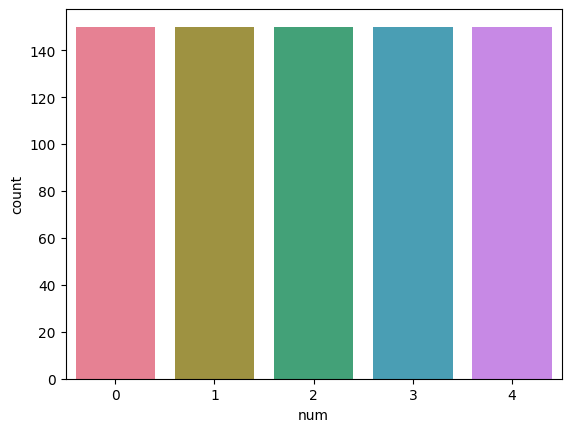

In [35]:
custom_palette = sns.color_palette("husl", 5)
resampled_train_data.dropna(inplace=True)
sns.countplot(x='num', data=resampled_train_data, palette=custom_palette)
plt.show()

In [36]:
resampled_train_data.num.value_counts()

num
0    150
1    150
2    150
3    150
4    150
Name: count, dtype: int64

In [38]:
df = pd.read_csv("heart_train_data_resampled_utils_riva.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       750 non-null    int64  
 1   sex       750 non-null    object 
 2   cp        750 non-null    object 
 3   trestbps  750 non-null    float64
 4   chol      750 non-null    float64
 5   fbs       750 non-null    bool   
 6   restecg   750 non-null    object 
 7   thalch    750 non-null    float64
 8   exang     750 non-null    bool   
 9   oldpeak   750 non-null    float64
 10  slope     750 non-null    object 
 11  ca        750 non-null    float64
 12  thal      750 non-null    object 
 13  num       750 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 71.9+ KB


# Preprocessing (Fitur Seleksi)

In [39]:
resampled_train_data = pd.read_csv('heart_train_data_resampled_utils_riva.csv')
test_data = pd.read_csv('heart_test_data_utils_riva.csv')

In [40]:
resampled_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       750 non-null    int64  
 1   sex       750 non-null    object 
 2   cp        750 non-null    object 
 3   trestbps  750 non-null    float64
 4   chol      750 non-null    float64
 5   fbs       750 non-null    bool   
 6   restecg   750 non-null    object 
 7   thalch    750 non-null    float64
 8   exang     750 non-null    bool   
 9   oldpeak   750 non-null    float64
 10  slope     750 non-null    object 
 11  ca        750 non-null    float64
 12  thal      750 non-null    object 
 13  num       750 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 71.9+ KB


In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       90 non-null     int64  
 1   sex       90 non-null     object 
 2   cp        90 non-null     object 
 3   trestbps  90 non-null     float64
 4   chol      90 non-null     float64
 5   fbs       90 non-null     bool   
 6   restecg   90 non-null     object 
 7   thalch    90 non-null     float64
 8   exang     90 non-null     bool   
 9   oldpeak   90 non-null     float64
 10  slope     90 non-null     object 
 11  ca        90 non-null     float64
 12  thal      90 non-null     object 
 13  num       90 non-null     int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 8.7+ KB


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

In [43]:
X_train = resampled_train_data.drop('num', axis=1)
y_train = resampled_train_data['num']

In [44]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,53,Female,asymptomatic,130.0,264.0,False,lv hypertrophy,143.0,False,0.400000,flat,0.0,normal
1,41,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.878788,flat,0.0,fixed defect
2,76,Female,non-anginal,140.0,197.0,False,st-t abnormality,116.0,False,1.100000,flat,0.0,normal
3,54,Male,non-anginal,150.0,232.0,False,lv hypertrophy,165.0,False,1.600000,upsloping,0.0,reversable defect
4,42,Female,asymptomatic,102.0,265.0,False,lv hypertrophy,122.0,False,0.600000,flat,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,57,Male,asymptomatic,165.0,289.0,True,lv hypertrophy,124.0,False,1.000000,flat,3.0,reversable defect
746,61,Male,asymptomatic,138.0,166.0,False,lv hypertrophy,125.0,True,3.600000,flat,1.0,normal
747,64,Male,asymptomatic,145.0,212.0,False,lv hypertrophy,132.0,False,2.000000,flat,2.0,fixed defect
748,64,Male,asymptomatic,145.0,212.0,False,lv hypertrophy,132.0,False,2.000000,flat,2.0,fixed defect


In [45]:
X_test = test_data.drop('num', axis=1)
y_test = test_data['num']

In [46]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object' and col != 'thal']
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

In [47]:
if 'thal' in X_train.columns:
    label_encoder = LabelEncoder()
    X_train['thal_encoded'] = label_encoder.fit_transform(X_train['thal'])
    X_test['thal_encoded'] = label_encoder.transform(X_test['thal'])

    # Drop original 'thal' column
    X_train.drop(columns=['thal'], inplace=True)
    X_test.drop(columns=['thal'], inplace=True)

In [48]:
if 'slope' in X_train.columns:
    label_encoder = LabelEncoder()
    X_train['slope_encoded'] = label_encoder.fit_transform(X_train['slope'])
    X_test['slope_encoded'] = label_encoder.transform(X_test['slope'])

    # Drop original 'slope' column
    X_train.drop(columns=['slope'], inplace=True)
    X_test.drop(columns=['slope'], inplace=True)

In [49]:
num_mapping = {
    0: 'tidak ada penyakit jantung',
    1: 'penyakit jantung ringan',
    2: 'penyakit jantung sedang',
    3: 'penyakit jantung berat',
    4: 'penyakit jantung kritis'
}
test_data['num_encoded'] = test_data['num'].map(num_mapping)

In [50]:
X_test_encoded = test_data.drop(['num', 'num_encoded'], axis=1)
y_test_encoded = test_data['num_encoded']

In [51]:
missing_cols = set(X_train.columns) - set(X_test.columns)


In [52]:
for col in missing_cols:
    X_test[col] = 0  # You can use other default values as needed

# Ensure the columns are in the same order
X_test = X_test[X_train.columns]

**Standarisasi Data**

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Fitur Selection dengan Variance Threshold**

In [54]:
from sklearn.feature_selection import VarianceThreshold

# Initialize and fit the VarianceThreshold
var_thr = VarianceThreshold(threshold=0.1)
var_thr.fit(X_train)

#transformasi data train
X_train_var = var_thr.transform(X_train)
X_test_var = var_thr.transform(X_test)

support_mask = var_thr.get_support()

print("Selected features (True indicates selected):", support_mask)

Selected features (True indicates selected): [ True  True  True  True  True  True  True  True  True  True  True False
  True False  True  True False False  True  True  True]


In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_var)
X_test_scaled = scaler.transform(X_test_var)

In [56]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

**MODEL SVM DENGAN FITUR SELEKSI VARIANCE THRESHOLD**

In [57]:
from sklearn import svm
clf_ovo = svm.SVC(decision_function_shape='ovo')
clf_ovo.fit(X_train_split, y_train_split)
dec_ovo = clf_ovo.decision_function(X_val_split)
print("Shape of decision function (ovo):", dec_ovo.shape[1])

clf_ovr = svm.SVC(decision_function_shape='ovr')
clf_ovr.fit(X_train_split, y_train_split)
dec_ovr = clf_ovr.decision_function(X_val_split)
print("Shape of decision function (ovr):", dec_ovr.shape[1]) 

Shape of decision function (ovo): 10
Shape of decision function (ovr): 5


In [ ]:
# lin_clf = svm.LinearSVC(dual=False)
# lin_clf.fit(X_train_split, y_train_split)

In [58]:
y_pred_ovo = clf_ovo.predict(X_val_split)
y_pred_ovr = clf_ovr.predict(X_val_split)


In [59]:
print("Accuracy (ovo):", accuracy_score(y_val_split, y_pred_ovo))
print("Accuracy (ovr):", accuracy_score(y_val_split, y_pred_ovr))

Accuracy (ovo): 0.9333333333333333
Accuracy (ovr): 0.9333333333333333


In [60]:
report = classification_report(y_val_split, y_pred_ovo, target_names=[num_mapping[i] for i in sorted(num_mapping.keys())])
print("Classification Report:")
print(report)


Classification Report:
                            precision    recall  f1-score   support

tidak ada penyakit jantung       1.00      0.91      0.95        32
   penyakit jantung ringan       0.90      0.93      0.92        30
   penyakit jantung sedang       0.89      0.97      0.93        34
    penyakit jantung berat       0.87      0.83      0.85        24
   penyakit jantung kritis       1.00      1.00      1.00        30

                  accuracy                           0.93       150
                 macro avg       0.93      0.93      0.93       150
              weighted avg       0.94      0.93      0.93       150



In [61]:
print("Classification Report (ovo):")
print(classification_report(y_val_split, y_pred_ovo))

print("Classification Report (ovr):")
print(classification_report(y_val_split, y_pred_ovr))


Classification Report (ovo):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.90      0.93      0.92        30
           2       0.89      0.97      0.93        34
           3       0.87      0.83      0.85        24
           4       1.00      1.00      1.00        30

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150

Classification Report (ovr):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.90      0.93      0.92        30
           2       0.89      0.97      0.93        34
           3       0.87      0.83      0.85        24
           4       1.00      1.00      1.00        30

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       

KERNEL

In [ ]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, decision_function_shape='ovr')  
    clf.fit(X_train_split, y_train_split)
    
    # prediksi dari validasi set
    y_pred = clf.predict(X_val_split)
    
    # akurasi
    print(f"Accuracy ({kernel} kernel):", accuracy_score(y_val_split, y_pred))
    
    # Generate and print classification report
    print(f"Classification Report ({kernel} kernel):")
    print(classification_report(y_val_split, y_pred))

    # Optionally, predict on the test set and generate a classification report
    # Note: Ensure the test set labels (y_test) are available for evaluation

    y_test_pred = clf.predict(X_test_scaled)
    print(f"Test Set Classification Report ({kernel} kernel):")
    print(classification_report(y_test, y_test_pred))


Accuracy (linear kernel): 0.4577777777777778
Classification Report (linear kernel):
              precision    recall  f1-score   support

           0       0.59      0.60      0.59        55
           1       0.32      0.44      0.37        39
           2       0.42      0.17      0.24        47
           3       0.35      0.50      0.41        38
           4       0.60      0.57      0.58        46

    accuracy                           0.46       225
   macro avg       0.46      0.45      0.44       225
weighted avg       0.47      0.46      0.45       225

Test Set Classification Report (linear kernel):
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        48
           1       0.09      0.12      0.10        17
           2       0.33      0.10      0.15        10
           3       0.08      0.09      0.08        11
           4       0.00      0.00      0.00         4

    accuracy                           0.42        90

In [ ]:
# plt.figure(figsize=(15, 5))
# for i, kernel in enumerate(kernels, start=1):
#     clf = svm.SVC(kernel=kernel, decision_function_shape='ovo')  
#     clf.fit(X_train_split[:, :2], y_train_split)  
    
#     # Plot decision boundaries
#     plt.subplot(1, 3, i)
#     plt.title(f'Decision Boundary ({kernel} kernel)')
#     h = .02  # Step size in the mesh
#     x_min, x_max = X_train_split[:, 0].min() - 1, X_train_split[:, 0].max() + 1
#     y_min, y_max = X_train_split[:, 1].min() - 1, X_train_split[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
#     # Plot training points
#     plt.scatter(X_train_split[:, 0], X_train_split[:, 1], c=y_train_split, cmap=plt.cm.Paired)
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())

# plt.tight_layout()
# plt.show()

In [ ]:
# kernels = ['linear', 'poly', 'rbf']

# # Buat plot
# plt.figure(figsize=(15, 5))

# for i, kernel in enumerate(kernels, start=1):
#     clf = svm.SVC(kernel=kernel, decision_function_shape='ovo')  
#     clf.fit(X_train_split[:, :2], y_train_split)  # Menggunakan dua fitur pertama untuk visualisasi
    
#     # Plot decision boundaries
#     plt.subplot(1, 3, i)
#     plt.title(f'Decision Boundary ({kernel} kernel)')
#     h = .02  # Step size in the mesh
#     x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
#     y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
#     # Plot testing points
#     plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())

# plt.tight_layout()
# plt.show()

**Feature Selection K-BEST AND CHI-SQUARE**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
resampled_train_data = pd.read_csv('heart_train_data_resampled_utils_riva.csv')
test_data = pd.read_csv('heart_test_data_utils_riva.csv')

In [ ]:
X_train = resampled_train_data.drop('num', axis=1)
y_train = resampled_train_data['num']

In [ ]:
X_test = test_data.drop('num', axis=1)
y_test = test_data['num']

In [ ]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object' and col != 'thal']
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

In [ ]:
if 'thal' in X_train.columns:
    label_encoder = LabelEncoder()
    
    # Fit LabelEncoder on the combined 'thal' column of both training and test sets
    label_encoder.fit(pd.concat([X_train['thal'], X_test['thal']], axis=0))
    
    # Transform 'thal' column to numerical values in both training and test sets
    X_train['thal_encoded'] = label_encoder.transform(X_train['thal'])
    X_test['thal_encoded'] = label_encoder.transform(X_test['thal'])

    # Drop original 'thal' column
    X_train.drop(columns=['thal'], inplace=True)
    X_test.drop(columns=['thal'], inplace=True)

In [ ]:
if 'slope' in X_train.columns:
    label_encoder = LabelEncoder()

    label_encoder.fit(pd.concat([X_train['slope'], X_test['slope']], axis=0))

    X_train['slope_encoded'] = label_encoder.fit_transform(X_train['slope'])
    X_test['slope_encoded'] = label_encoder.transform(X_test['slope'])

    # Drop original 'slope' column
    X_train.drop(columns=['slope'], inplace=True)
    X_test.drop(columns=['slope'], inplace=True)

In [ ]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  
X_test = X_test[X_train.columns]

In [ ]:
if 'restecg_st-t abnormality' not in X_test.columns:
    X_test['restecg_st-t abnormality'] = 0

In [ ]:
X_test = X_test[X_train.columns]

In [ ]:
k_best = 3  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)

In [ ]:
clf = svm.SVC(kernel='poly', random_state=42)  # You can choose the kernel here
clf.fit(X_train_split, y_train_split)


SVC(kernel='poly', random_state=42)

In [ ]:
y_pred = clf.predict(X_val_split)
# Generate and print classification report
print("Classification Report:")
print(classification_report(y_val_split, y_pred))

y_test_pred = clf.predict(X_test_scaled)
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.35      0.42        55
           1       0.19      0.62      0.29        39
           2       0.83      0.21      0.34        47
           3       0.45      0.34      0.39        38
           4       0.83      0.41      0.55        46

    accuracy                           0.38       225
   macro avg       0.57      0.39      0.40       225
weighted avg       0.58      0.38      0.40       225

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.48      0.63        48
           1       0.24      0.65      0.35        17
           2       0.12      0.10      0.11        10
           3       0.33      0.18      0.24        11
           4       0.00      0.00      0.00         4

    accuracy                           0.41        90
   macro avg       0.32      0.28      0.27        90
weighted avg       0.5

In [ ]:
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import f1_score

# f1_score_list = []

# for k in range(1, 14):
#     # Inisialisasi dan fitur selection dengan SelectKBest
#     selector = SelectKBest(score_func=chi2, k=k)
#     selector.fit(X_train, y_train)
    
#     # Transformasi data menggunakan fitur yang terpilih
#     sel_X_train = selector.transform(X_train)
#     sel_X_test = selector.transform(X_test)
    
#     # Inisialisasi dan pelatihan model Gradient Boosting Classifier
#     gbc = GradientBoostingClassifier()
#     gbc.fit(sel_X_train, y_train)
    
#     # Membuat prediksi menggunakan data uji yang telah dipilih fiturnya
#     kbest_preds = gbc.predict(sel_X_test)
    
#     # Menghitung skor F1 dan menambahkannya ke dalam daftar skor
#     f1 = f1_score(y_test, kbest_preds, average='weighted')
#     f1_score_list.append(f1)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# Inisialisasi dan fitur selection dengan SelectKBest
selector = SelectKBest(score_func=chi2, k=k_best)
selector.fit(X_train, y_train)

# Ambil nilai statistik chi-square
chi_square_stats = selector.scores_

# Cetak nilai statistik untuk setiap fitur
for i, feature_name in enumerate(X_train.columns):
    print(f"Chi-square statistic for {feature_name}: {chi_square_stats[i]}")

Chi-square statistic for age: 23.225425793660296
Chi-square statistic for trestbps: 69.90908546206242
Chi-square statistic for chol: 543.1694826043482
Chi-square statistic for fbs: 31.000000000000032
Chi-square statistic for thalch: 382.23615015088455
Chi-square statistic for exang: 58.64437689969612
Chi-square statistic for oldpeak: 183.1427296494307
Chi-square statistic for ca: 185.64084507042276
Chi-square statistic for sex_Female: 37.97590361445787
Chi-square statistic for sex_Male: 10.794520547945215
Chi-square statistic for cp_asymptomatic: 56.179226069246496
Chi-square statistic for cp_atypical angina: 59.08196721311481
Chi-square statistic for cp_non-anginal: 73.33774834437094
Chi-square statistic for cp_typical angina: 25.87234042553194
Chi-square statistic for restecg_lv hypertrophy: 21.178294573643434
Chi-square statistic for restecg_normal: 46.79876160990716
Chi-square statistic for restecg_st-t abnormality: 39.25000000000004
Chi-square statistic for slope_downsloping: 30.2

# **K_BEST dan ANN**

In [ ]:
k_best = 5  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k_best)
X_train_selected = selector.fit_transform(X_train_var, y_train)
X_test_selected = selector.transform(X_test_var)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)

In [ ]:
# Step 5: Build and train the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100), activation='identity', solver='sgd', random_state=42)
ann_model.fit(X_train_split, y_train_split)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', hidden_layer_sizes=100, random_state=42,
              solver='sgd')

In [ ]:
y_pred = ann_model.predict(X_val_split)

In [ ]:
print("Accuracy:", accuracy_score(y_val_split, y_pred))
print("Classification Report:")
print(classification_report(y_val_split, y_pred))

Accuracy: 0.47555555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66        55
           1       0.37      0.46      0.41        39
           2       0.55      0.38      0.45        47
           3       0.30      0.32      0.31        38
           4       0.49      0.46      0.47        46

    accuracy                           0.48       225
   macro avg       0.47      0.46      0.46       225
weighted avg       0.48      0.48      0.47       225



In [ ]:
y_test_pred = ann_model.predict(X_test_scaled)
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        48
           1       0.23      0.29      0.26        17
           2       0.00      0.00      0.00        10
           3       0.14      0.09      0.11        11
           4       0.00      0.00      0.00         4

    accuracy                           0.49        90
   macro avg       0.24      0.24      0.24        90
weighted avg       0.51      0.49      0.50        90



**K-Best dan SVM**

In [ ]:
svm_model_kbest = SVC(kernel='poly', random_state=42)
# The 'kernel' parameter of SVC must be a str among {'poly', 'precomputed', 'rbf', 'linear', 'sigmoid'} or a callable. Got 'pol' instead.

In [ ]:
svm_model_kbest.fit(X_train_kbest, y_train)

NameError: name 'X_train_kbest' is not defined

In [ ]:
y_pred_svm = svm_model_kbest.predict(X_test_kbest)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.19      0.18      0.18        17
           2       0.08      0.10      0.09        10
           3       0.00      0.00      0.00        11
           4       0.10      0.25      0.14         4

    accuracy                           0.50        90
   macro avg       0.24      0.27      0.25        90
weighted avg       0.48      0.50      0.49        90


Accuracy Score:
0.5


*CHI SQUARE TEST dan SVM*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Melakukan scaling untuk memastikan nilai fitur tidak negatif
scaler = MinMaxScaler()
X_train_scaled_non_negative = scaler.fit_transform(X_train_scaled)
X_test_scaled_non_negative = scaler.transform(X_test_scaled)

# Menggunakan fitur seleksi dengan Chi-Square
from sklearn.feature_selection import SelectKBest, chi2

# Misalkan kita akan memilih 5 fitur terbaik
chi2_selector = SelectKBest(score_func=chi2, k=5)
X_train_chi2 = chi2_selector.fit_transform(X_train_scaled_non_negative, y_train)
X_test_chi2 = chi2_selector.transform(X_test_scaled_non_negative)


In [ ]:
svm_model_chi2 = SVC(kernel='poly', degree=7, gamma='auto', coef0=0.1,random_state=42)

In [ ]:
svm_model_chi2.fit(X_train_chi2, y_train)


SVC(coef0=0.1, degree=7, gamma='auto', kernel='poly', random_state=42)

In [ ]:
y_pred_svm_chi2 = svm_model_chi2.predict(X_test_chi2)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_chi2))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm_chi2))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.23      0.35        48
           1       0.14      0.24      0.18        17
           2       0.17      0.80      0.29        10
           3       1.00      0.09      0.17        11
           4       0.00      0.00      0.00         4

    accuracy                           0.27        90
   macro avg       0.41      0.27      0.20        90
weighted avg       0.56      0.27      0.27        90


Accuracy Score:
0.26666666666666666


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
# fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
#     ncols=3, figsize=(14, 4)
# )

# # Plot original testing data
# orig_data_ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test)
# orig_data_ax.set_ylabel("Feature #1")
# orig_data_ax.set_xlabel("Feature #0")
# orig_data_ax.set_title("Testing data")

# # Plot projection of testing data using PCA
# pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
# pca_proj_ax.set_ylabel("Principal component #1")
# pca_proj_ax.set_xlabel("Principal component #0")
# pca_proj_ax.set_title("Projection of testing data\n using PCA")

# # Plot projection of testing data using KernelPCA
# kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
# kernel_pca_proj_ax.set_ylabel("Principal component #1")
# kernel_pca_proj_ax.set_xlabel("Principal component #0")
# _ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

# plt.tight_layout()
# plt.show()

*CHI SQUARE TEST dan ANN*

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# # Scaling data untuk memastikan nilai fitur tidak negatif
# scaler = MinMaxScaler()
# X_train_scaled_non_negative = scaler.fit_transform(X_train_scaled)
# X_test_scaled_non_negative = scaler.transform(X_test_scaled)

In [ ]:
# # Menggunakan fitur seleksi dengan Chi-Square
# chi2_selector = SelectKBest(score_func=chi2, k=5)
# X_train_chi2 = chi2_selector.fit_transform(X_train_scaled_non_negative, y_train)
# X_test_chi2 = chi2_selector.transform(X_test_scaled_non_negative)

In [ ]:
# # Melatih model ANN dengan fitur yang dipilih
# ann_model_chi2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
# ann_model_chi2.fit(X_train_chi2, y_train)

In [ ]:
# # Memprediksi hasil menggunakan model ANN yang sudah dilatih
# y_pred_ann_chi2 = ann_model_chi2.predict(X_test_chi2)

In [ ]:
# # Menampilkan laporan klasifikasi dan akurasi
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_ann_chi2))
# print("\nAccuracy Score:")
# print(accuracy_score(y_test, y_pred_ann_chi2))

*threshold TEST dan ANN*

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve


In [ ]:
# Scaling data untuk memastikan nilai fitur tidak negatif
scaler = MinMaxScaler()
X_train_scaled_non_negative = scaler.fit_transform(X_train_scaled)
X_test_scaled_non_negative = scaler.transform(X_test_scaled)


In [ ]:
# Menggunakan fitur seleksi dengan Chi-Square
chi2_selector = SelectKBest(score_func=chi2, k=5)
X_train_chi2 = chi2_selector.fit_transform(X_train_scaled_non_negative, y_train)
X_test_chi2 = chi2_selector.transform(X_test_scaled_non_negative)

In [ ]:
# Melatih model ANN dengan fitur yang dipilih
ann_model_chi2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
ann_model_chi2.fit(X_train_chi2, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [ ]:
# Memprediksi probabilitas kelas positif
y_proba_ann_chi2 = ann_model_chi2.predict_proba(X_test_chi2)[:, 1]

In [ ]:
# Menyesuaikan threshold
threshold = 0.5  # Ubah threshold sesuai kebutuhan
y_pred_ann_chi2_threshold = (y_proba_ann_chi2 >= threshold).astype(int)

In [ ]:
# Menampilkan laporan klasifikasi dan akurasi
print("\nClassification Report with Threshold:")
print(classification_report(y_test, y_pred_ann_chi2_threshold))
print("\nAccuracy Score with Threshold:")
print(accuracy_score(y_test, y_pred_ann_chi2_threshold))


Classification Report with Threshold:
              precision    recall  f1-score   support

           0       0.55      0.96      0.70        48
           1       0.33      0.12      0.17        17
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         4

    accuracy                           0.53        90
   macro avg       0.18      0.22      0.17        90
weighted avg       0.36      0.53      0.40        90


Accuracy Score with Threshold:
0.5333333333333333


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  